In [39]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [40]:
# Load .env enviroment variables
load_dotenv("C:/Users/Eric/Desktop/api keys/.env")

True

In [41]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [42]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [43]:
# Fetch current BTC price
btc_price_request = requests.get(btc_url).json()
my_btc_value = btc_price_request["data"]["1"]["quotes"]["CAD"]["price"] 

# Fetch current ETH price
eth_price_request = requests.get(eth_url).json()
my_eth_value = eth_price_request["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value}")
print(f"The current value of your crypto is ${my_crypto_value}") 

The current value of your 1.2 BTC is $26569.0952
The current value of your 5.3 ETH is $1509.937088
The current value of your crypto is $28079.032288


In [156]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [157]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [185]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date
).df
# set index and drop columns 
df_portfolio.index = df_portfolio.index.date
df_portfolio = df_portfolio.drop(columns=["trade_count", "vwap"])

In [186]:
df_portfolio.head()

,open,high,low,close,volume,symbol
2022-06-24,101.11,101.47,100.995,101.05,7379452,AGG
2022-06-24,381.43,390.09,381.365,390.08,97628636,SPY


In [187]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY']
AGG = df_portfolio[df_portfolio['symbol']=='AGG']

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG], axis="columns", join="inner", keys=['SPY', 'AGG']) 
# Preview DataFrame
df_portfolio.head()

SPY                                               AGG          \
              open    high      low   close    volume symbol    open    high   
2022-06-24  381.43  390.09  381.365  390.08  97628636    SPY  101.11  101.47   

                                             
                low   close   volume symbol  
2022-06-24  100.995  101.05  7379452    AGG

In [189]:
# Pick AGG and SPY close prices
agg_close = float(df_portfolio["AGG"]["close"])
spy_close = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $390.08
Current SPY closing price: $101.05


In [191]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close 
my_spy_value = my_spy * spy_close 
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $19504.0
The current value of your 200 AGG shares is $20210.0


In [200]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value
data = {"amount":[total_crypto, total_shares]} 
# Create savings DataFrame
df_savings = pd.DataFrame(data, index=['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,28079.032288
shares,39714.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

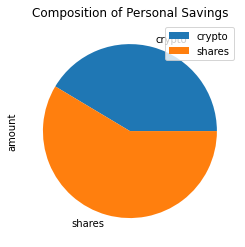

In [201]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [202]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal!") 
else:
    print(f"You are almost there! You are {emergency_fund - total_savings} dollars away from your goal.") 
          


Congratulations! You have enough money in your emergency fund!


In [210]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [212]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_bars(
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date
).df

# drop columns 
df_stock_data = df_stock_data.drop(columns=["trade_count", "vwap"])

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY']
AGG = df_stock_data[df_stock_data['symbol']=='AGG']

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis="columns", join="inner", keys=['SPY', 'AGG']) 
# Preview DataFrame
df_stock_data.head()

SPY                                            \
                             open    high     low   close     volume symbol   
timestamp                                                                     
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515    SPY   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142    SPY   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810    SPY   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222    SPY   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004    SPY   

                              AGG                                              
                             open      high       low   close   volume symbol  
timestamp                                                                      
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939    AGG  
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940    AGG  
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608    AGG  
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142    AGG  
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710    AGG

In [216]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [217]:
MC_even_dist.portfolio_data.head()

SPY                                            \
                             open    high     low   close     volume symbol   
timestamp                                                                     
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515    SPY   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142    SPY   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810    SPY   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222    SPY   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004    SPY   

                                           AGG                              \
                          daily_return    open      high       low   close   
timestamp                                                                    
2016-05-02 04:00:00+00:00          NaN  110.74  110.7400  110.5200  110.61   
2016-05-03 04:00:00+00:00    -0.009133  110.89  110.9450  110.7500  110.81   
2016-05-04 04:00:00+00:00    -0.005676  110.91  110.9315  110.7595  110.86   
2016-05-05 04:00:00+00:00    -0.000049  110.92  111.1600  110.8010  111.14   
2016-05-06 04:00:00+00:00     0.003659  111.12  111.1200  110.9700  110.97   

                                                        
                            volume symbol daily_return  
timestamp                                               
2016-05-02 04:00:00+00:00  3553939    AGG          NaN  
2016-05-03 04:00:00+00:00  3044940    AGG     0.001808  
2016-05-04 04:00:00+00:00  2920608    AGG     0.000451  
2016-05-05 04:00:00+00:00  3008142    AGG     0.002526  
2016-05-06 04:00:00+00:00  2718710    AGG    -0.001530

In [218]:
# Printing the simulation input data
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Eric\Desktop\Class repositories\financial planning 5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995376,1.005012,1.003188,1.004962,0.998623,0.998107,0.996756,1.004500,1.003471,0.996500,...,1.004623,0.999243,1.001278,1.003700,0.999694,1.006958,1.002890,0.998308,0.997805,1.000823
2,0.996191,1.000276,0.991422,0.995739,0.996269,0.995602,1.004224,1.004234,1.004109,0.997767,...,1.013691,0.999016,0.999638,1.009071,0.995109,1.010816,1.006959,0.993676,0.998784,1.000590
3,0.990358,0.996130,0.993433,0.994100,1.003601,0.992071,1.006409,1.010741,1.008638,0.991157,...,1.012108,1.005673,0.988309,1.013964,0.996414,1.002570,0.993568,0.994616,0.996827,1.008173
4,0.990891,0.997170,1.004877,1.000991,1.004130,0.984849,1.009206,1.004355,1.008969,0.999187,...,1.010239,1.006703,0.986021,1.018648,0.996476,1.002737,1.001187,0.984820,1.003277,1.008586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.121033,9.258410,7.245889,10.212793,4.715820,13.883336,12.492737,18.454528,9.059531,8.765845,...,17.895318,12.047532,10.250315,5.384353,9.731370,7.399512,5.098692,8.416071,6.403695,13.199508
7557,9.051864,9.281635,7.224466,10.201716,4.728753,13.922768,12.467210,18.453938,9.033420,8.813306,...,18.005532,12.022787,10.270273,5.391787,9.670556,7.435789,5.125742,8.399619,6.374717,13.194653
7558,9.029770,9.277045,7.231686,10.191657,4.734667,13.873303,12.504512,18.471517,9.079488,8.859173,...,18.088713,11.922879,10.223702,5.365193,9.639933,7.432607,5.187417,8.363804,6.381332,13.057057
7559,9.012453,9.299553,7.278386,10.183341,4.711376,13.802128,12.572869,18.468752,9.096637,8.886061,...,18.096782,11.917731,10.206696,5.365661,9.502172,7.475127,5.218418,8.398290,6.348168,13.022941


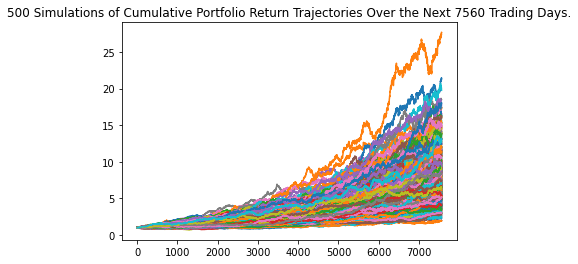

In [219]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

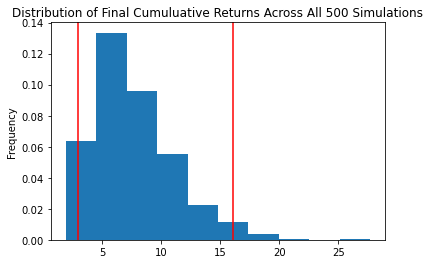

In [220]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [221]:
# Fetch summary statistics from the Monte Carlo simulation results
even_dist_summary = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_dist_summary) 

count           500.000000
mean              7.723205
std               3.509415
min               1.921794
25%               5.121983
50%               6.984199
75%               9.539515
max              27.695378
95% CI Lower      2.929738
95% CI Upper     16.066612
Name: 7560, dtype: float64


In [222]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_dist_summary[8]*20000,2)
even_ci_upper = round(even_dist_summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $58594.75 and $321332.24
